#                                     __GRIP:The Spark Foundation__


# TASK 2 : MASK, No Mask Face Detecation

* __Author : SHUBHAM UNDE__
* __Task 2nd__
* __Computer Vision & AI__

#  __Detection OF Mask or No Mask__

* __Project Aim__ 
* Masks are essentials things now days,so here i tried to detect mask on face or not.
* Masks are a simple barrier to help prevent your respiratory droplets from reaching others Studies
* show that masks reduce the spray of droplets when worn over the nose and mouth You should wear a mask, even if you do not feel sick.
* So to detect Mask in ON or Not on the faces to reduce risk of social transmission Of Covid 19 

* here i created this project with Combination of CNN and OpenCV,
* Combination of CNN with Open cv gives you highest accuracy 

#  __Content__


* __1.Importing Relevent Libraries__
* __2.Importing Trainng Data(Images) of Mask and No mask__
* __3.Checking Input Data is correct__
* __4.Importing Libraries OF CNN__
* __5.Model Creation,Model Compilation and Fittting the compiled Model, Model Performance.__
* __6.Importing OpenCV libararies__
* __7.Permorfoming Live Working Model__

* __1.Importing Libraries__

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* __2.Importing Training Data (Image form)__

In [2]:
path1 = r"F:\DATA SCIENCE\Mask_NoMask" 
cate = ['Mask' , 'No_Mask']

In [3]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

F:\DATA SCIENCE\Mask_NoMask\Mask
F:\DATA SCIENCE\Mask_NoMask\No_Mask


* __Resizing Images for smooth model peroformance__

In [4]:
image_size = 200

path1 = r"F:\DATA SCIENCE\Mask_NoMask" 
cate = ['Mask' , 'No_Mask']

input_image = []  # empty list
for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i)  # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size , image_size)) # resizing each image to 50 * 50)
        input_image.append([image_array , label])


* __3.Crosschecking the imported tariing Data__

In [5]:
# Check len of input image

len(input_image)

8838

In [6]:
input_image[8800]

[array([[[181, 184, 199],
         [181, 184, 199],
         [181, 184, 199],
         ...,
         [178, 182, 193],
         [178, 182, 193],
         [178, 182, 193]],
 
        [[181, 184, 199],
         [181, 184, 199],
         [182, 185, 200],
         ...,
         [178, 182, 193],
         [178, 182, 193],
         [178, 182, 193]],
 
        [[181, 184, 199],
         [181, 184, 199],
         [182, 185, 200],
         ...,
         [178, 182, 193],
         [178, 182, 193],
         [178, 182, 193]],
 
        ...,
 
        [[181, 181, 193],
         [181, 181, 193],
         [181, 181, 193],
         ...,
         [168, 168, 180],
         [168, 168, 180],
         [168, 168, 180]],
 
        [[181, 181, 193],
         [181, 181, 193],
         [181, 181, 193],
         ...,
         [167, 167, 179],
         [168, 168, 180],
         [168, 168, 180]],
 
        [[181, 181, 193],
         [181, 181, 193],
         [181, 181, 193],
         ...,
         [166, 166, 178],
  

In [7]:
# Shuffle mask and n0 mask images

np.random.shuffle(input_image)

In [8]:
# Make empty list to store train and test file

X = []
Y = []

In [9]:
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
len(X)

8838

In [12]:
len(Y)

8838

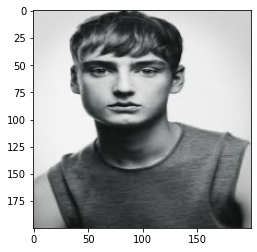

In [13]:
plt.imshow(X[8800])

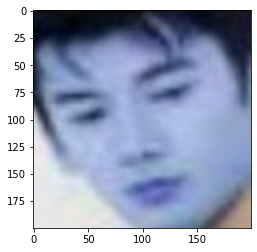

In [14]:
plt.imshow(X[7521])

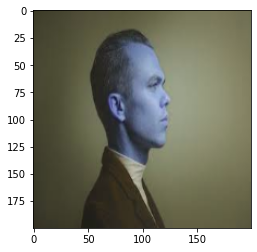

In [15]:
plt.imshow(X[87])

In [16]:
X = X/255  # drive by 255 as highest value any pixcell can take is 255

* __4.Importing CNN libraries__

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical

* __5.1 Model Making__

In [18]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size = (3,3) , activation = 'relu' ,))
model.add(MaxPool2D(pool_size = (2,2)))  # 1 pair of conv and pooling


model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))  # 2nd pair of conv and pooling.....stacked

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))

model.add(Dense(2 , activation = 'softmax'))

In [19]:
# Compile a model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

* __5.2 Model Compilation__

In [20]:
# Fit model with X and Y

model.fit(X, Y ,epochs=3)

Epoch 1/3
277/277 [==============================] - 162s 586ms/step - loss: 0.5739 - accuracy: 0.8055
Epoch 2/3
277/277 [==============================] - 150s 543ms/step - loss: 0.2101 - accuracy: 0.9194
Epoch 3/3
277/277 [==============================] - 164s 593ms/step - loss: 0.1277 - accuracy: 0.9517


In [23]:
model.save("mask_nomask.h5")

In [21]:
# Prediction

pred = model.predict_classes(X)
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [22]:
pred[1:50]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

* __5.3 Model Performance__

In [23]:
from  sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(pred, Y)
mat

array([[4676,  131],
       [ 115, 3916]], dtype=int64)

In [24]:
mat.diagonal().sum() / mat.sum() * 100

97.21656483367278

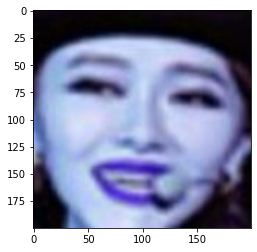

In [25]:
plt.imshow(X[6])

In [26]:
from keras.models import load_model

In [27]:
pwd

'C:\\Users\\shrad'

* __6. Importing Open CV libraries__

In [28]:
def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces is ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-28-1191a396d2a9>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


* __7.Live model Performance__

In [30]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model("mask_nomask.h5")

results={0:'Mask found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier(r"F:\DATA SCIENCE\computer vision\harcascade\haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(1)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()